# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skrub import TableReport
from ydata_profiling import ProfileReport
from IPython.display import display

from churn_classification_engine.config import settings

In [3]:
DATA_PATH = ".." / settings.data_dir / settings.data_filename
REPORTS_DIR = ".." / settings.reports_dir

In [4]:
df = pd.read_csv(DATA_PATH)

In [5]:
df.head()

CUSTOMER_ID COUNTRY_CODE  PLAN_AGE  ACTIVITY_DAY_COUNT  \
0       100001           FR        56                 NaN   
1       100002           FR        57                 NaN   
2       100003           FR        59                 NaN   
3       100004           FR        61                 NaN   
4       100005           FR        62                 NaN   

   SUPPORT_TICKET_COUNT  DELINQUENCY_DAY_COUNT PLAN_NAME BILLING_PERIOD  \
0                   NaN                    NaN       Pro          month   
1                   NaN                    NaN       Pro          month   
2                   NaN                    NaN       Pro          month   
3                   NaN                    NaN       Pro          month   
4                   NaN                    NaN       Pro          month   

  CURRENCY  MONTHLY_PAYMENT_AMOUNT  DAYS_SINCE_LAST_LOGIN  CHURN  
0      USD                     140                    NaN      0  
1      USD                     140                    NaN      0  
2      USD                     140                    NaN      0  
3      USD                     140                    NaN      0  
4      USD                     140                    NaN      0

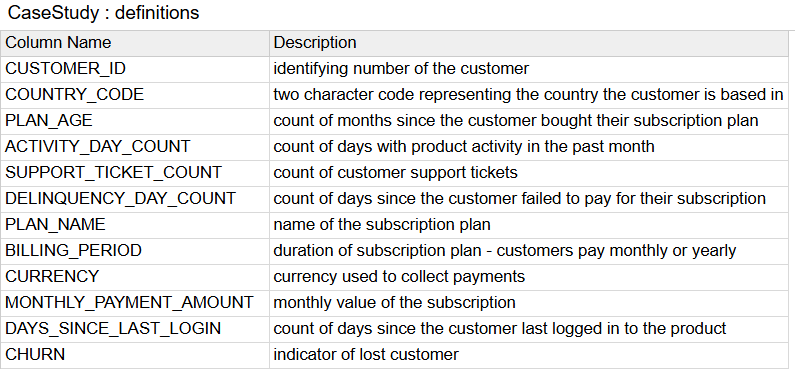

In [6]:
table_report = TableReport(df)
table_report.write_html(REPORTS_DIR / "table_report.html")
table_report

Processing column  12 / 12


<TableReport: use .open() to display>

Binary classification problem, with imbalanced data, with 4 categorical features and 6 numerical features.

In [7]:
profile = ProfileReport(df, title="Profiling Report")

In [8]:
profile.to_file(REPORTS_DIR / "profiling_report.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 19.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
nan_columns_mask = df.isnull().sum() > 0
nan_columns = df.columns[nan_columns_mask].tolist()

In [10]:
nan_df = df[nan_columns].isnull().astype(int)
nan_df["CHURN"] = df["CHURN"]

In [11]:
nan_df

COUNTRY_CODE  ACTIVITY_DAY_COUNT  SUPPORT_TICKET_COUNT  \
0                  0                   1                     1   
1                  0                   1                     1   
2                  0                   1                     1   
3                  0                   1                     1   
4                  0                   1                     1   
...              ...                 ...                   ...   
109696             0                   1                     1   
109697             0                   1                     1   
109698             0                   1                     1   
109699             0                   1                     1   
109700             0                   0                     1   

        DELINQUENCY_DAY_COUNT  CURRENCY  DAYS_SINCE_LAST_LOGIN  CHURN  
0                           1         0                      1      0  
1                           1         0                      1      0  
2                           1         0                      1      0  
3                           1         0                      1      0  
4                           1         0                      1      0  
...                       ...       ...                    ...    ...  
109696                      1         0                      1      0  
109697                      0         0                      1      0  
109698                      0         0                      1      0  
109699                      1         0                      1      0  
109700                      1         0                      0      0  

[109701 rows x 7 columns]

In [12]:
nan_table_report = TableReport(nan_df)
nan_table_report

Processing column   7 / 7


<TableReport: use .open() to display>

In [13]:
nan_profile = ProfileReport(nan_df, title="NaN Profiling Report")
nan_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 369.68it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [134]:
for col in nan_columns:
    display(nan_df.groupby(col)["CHURN"].agg(["size", "mean"]))

size      mean
COUNTRY_CODE                  
0             108310  0.159025
1               1391  0.093458

size      mean
ACTIVITY_DAY_COUNT                 
0                   28456  0.166397
1                   81245  0.155320

size      mean
SUPPORT_TICKET_COUNT                 
0                     11035  0.235070
1                     98666  0.149596

size      mean
DELINQUENCY_DAY_COUNT                  
0                        4744  0.230607
1                      104957  0.154921

size      mean
CURRENCY                  
0         108335  0.159588
1           1366  0.047584

size      mean
DAYS_SINCE_LAST_LOGIN                 
0                      28456  0.166397
1                      81245  0.155320

Seeing the change of churners proportion in missing values group, we can think that NaN represents a separate category or a negative case for the following columns:  
- COUNTRY_CODE
- SUPPORT_TICKET_COUNT
- DELINQUENCY_DAY_ACCOUNT
- CURRENCY

Then, COUNTRY_CODE & CURRENCY can be filled with "UNKNOWN" and SUPPORT_TICKET_COUNT & DELINQUENCY_DAY_COUNT by -1.

In [14]:
df.groupby("DAYS_SINCE_LAST_LOGIN", dropna=False)["CHURN"].agg(["size", "mean"])

size      mean
DAYS_SINCE_LAST_LOGIN                 
0.0                    11926  0.126279
1.0                     1386  0.155844
2.0                      688  0.200581
3.0                      566  0.227915
4.0                      470  0.208511
5.0                      385  0.218182
6.0                      302  0.231788
7.0                      379  0.218997
8.0                      494  0.208502
9.0                      331  0.280967
10.0                     316  0.275316
11.0                    4240  0.128538
12.0                     711  0.192686
13.0                     457  0.238512
14.0                     702  0.205128
15.0                     654  0.207951
16.0                     489  0.222904
17.0                     453  0.251656
18.0                     357  0.215686
19.0                     267  0.243446
20.0                     278  0.237410
21.0                     289  0.228374
22.0                     354  0.240113
23.0                     314  0.270701
24.0                     258  0.244186
25.0                     304  0.243421
26.0                     370  0.205405
27.0                     187  0.272727
28.0                     215  0.218605
29.0                     207  0.222222
30.0                     107  0.308411
NaN                    81245  0.155320

In [15]:
df.groupby("ACTIVITY_DAY_COUNT", dropna=False)["CHURN"].agg(["size", "mean"])

size      mean
ACTIVITY_DAY_COUNT                 
1.0                  3229  0.244967
2.0                  2058  0.252672
3.0                  1421  0.225194
4.0                  1056  0.232955
5.0                   929  0.193757
6.0                   805  0.187578
7.0                   697  0.199426
8.0                   644  0.194099
9.0                   558  0.207885
10.0                  536  0.175373
11.0                  490  0.212245
12.0                  425  0.148235
13.0                  466  0.135193
14.0                  529  0.173913
15.0                  539  0.168831
16.0                  559  0.162791
17.0                  452  0.163717
18.0                  453  0.156733
19.0                  544  0.152574
20.0                 2277  0.100132
21.0                  364  0.123626
22.0                  350  0.151429
23.0                  394  0.124365
24.0                  283  0.102473
25.0                  290  0.131034
26.0                  333  0.120120
27.0                  354  0.132768
28.0                  301  0.112957
29.0                  316  0.123418
30.0                 2566  0.111458
31.0                 4238  0.102171
NaN                 81245  0.155320

In [16]:
df["CUSTOMER_ID"]

0         100001
1         100002
2         100003
3         100004
4         100005
           ...  
109696    209697
109697    209698
109698    209699
109699    209700
109700    209701
Name: CUSTOMER_ID, Length: 109701, dtype: int64

ID are not random, they are certainly incrementally generated adding 1 for each new customer. Then, it contains informations !   
Even if it's not usually and elegant, it can be used as a feature, because it can give insights ! 

In [17]:
df[["CUSTOMER_ID", "PLAN_AGE"]].head(60)

CUSTOMER_ID  PLAN_AGE
0        100001        56
1        100002        57
2        100003        59
3        100004        61
4        100005        62
5        100006        65
6        100007        64
7        100008        66
8        100009        60
9        100010        63
10       100011        58
11       100012        63
12       100013        60
13       100014        57
14       100015        62
15       100016        64
16       100017        61
17       100018        55
18       100019        59
19       100020        58
20       100021        56
21       100022        54
22       100023        53
23       100024        53
24       100025        52
25       100026        54
26       100027        51
27       100028        56
28       100029        49
29       100030        57
30       100031        47
31       100032        50
32       100033        48
33       100034        55
34       100035        46
35       100036        51
36       100037        52
37       100038        47
38       100039        49
39       100040        46
40       100041        48
41       100042        50
42       100043        45
43       100044        45
44       100045        52
45       100046        56
46       100047        55
47       100048        49
48       100049        51
49       100050        50
50       100051        47
51       100052        48
52       100053        46
53       100054        53
54       100055        54
55       100056        48
56       100057        50
57       100058        45
58       100059        47
59       100060        46

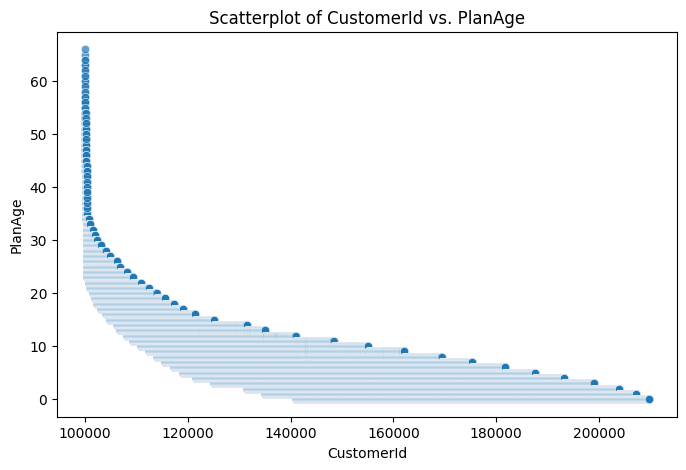

In [143]:
# Create scatterplot using seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["CUSTOMER_ID"], y=df["PLAN_AGE"], alpha=0.7)

# Add labels and title
plt.xlabel("CustomerId")
plt.ylabel("PlanAge")
plt.title("Scatterplot of CustomerId vs. PlanAge")

# Show the plot
plt.show()

It's not perfectly correlated with PLAN_AGE, it can be explained by the fact that a user switch offer.  
Can be discussed with Infra & business team.

In [18]:
df[["CUSTOMER_ID", "PLAN_AGE"]].tail(60)

CUSTOMER_ID  PLAN_AGE
109641       209642         0
109642       209643         0
109643       209644         0
109644       209645         0
109645       209646         0
109646       209647         0
109647       209648         0
109648       209649         0
109649       209650         0
109650       209651         0
109651       209652         0
109652       209653         0
109653       209654         0
109654       209655         0
109655       209656         0
109656       209657         0
109657       209658         0
109658       209659         0
109659       209660         0
109660       209661         0
109661       209662         0
109662       209663         0
109663       209664         0
109664       209665         0
109665       209666         0
109666       209667         0
109667       209668         0
109668       209669         0
109669       209670         0
109670       209671         0
109671       209672         0
109672       209673         0
109673       209674         0
109674       209675         0
109675       209676         0
109676       209677         0
109677       209678         0
109678       209679         0
109679       209680         0
109680       209681         0
109681       209682         0
109682       209683         0
109683       209684         0
109684       209685         0
109685       209686         0
109686       209687         0
109687       209688         0
109688       209689         0
109689       209690         0
109690       209691         0
109691       209692         0
109692       209693         0
109693       209694         0
109694       209695         0
109695       209696         0
109696       209697         0
109697       209698         0
109698       209699         0
109699       209700         0
109700       209701         0

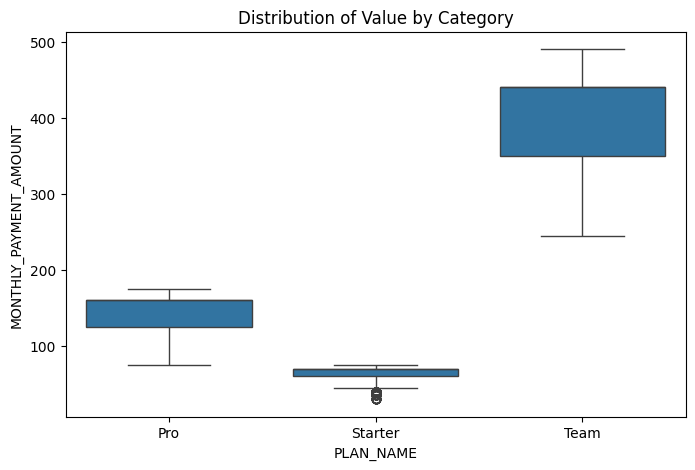

In [19]:
# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x="PLAN_NAME", y="MONTHLY_PAYMENT_AMOUNT", data=df)

plt.title("Distribution of Value by Category")
plt.xlabel("PLAN_NAME")
plt.ylabel("MONTHLY_PAYMENT_AMOUNT")
plt.show()

In [20]:
df.groupby("PLAN_NAME")["MONTHLY_PAYMENT_AMOUNT"].agg(
    ["size", "min", "max", "median"]
).sort_values("min")

size  min  max  median
PLAN_NAME                         
Starter    87902   30   75    70.0
Pro        19083   75  175   160.0
Team        2716  245  490   440.0

2 features perfectly correlated, as shown in the previous reports

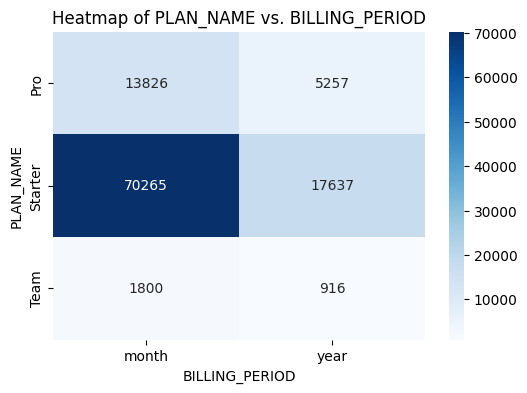

In [21]:
# Create a contingency table (cross-tab)
contingency_table = pd.crosstab(df["PLAN_NAME"], df["BILLING_PERIOD"])

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.title("Heatmap of PLAN_NAME vs. BILLING_PERIOD")
plt.show()

In [22]:
df.groupby("PLAN_NAME")["CHURN"].agg(["size", "mean", "std"]).sort_values("mean")

size      mean       std
PLAN_NAME                           
Team        2716  0.072165  0.258808
Pro        19083  0.094692  0.292796
Starter    87902  0.174638  0.379659

In [23]:
df.groupby("BILLING_PERIOD")["CHURN"].agg(["size", "mean", "std"]).sort_values("mean")

size      mean       std
BILLING_PERIOD                           
year            23810  0.038429  0.192234
month           85891  0.191394  0.393401

In [24]:
df.groupby("CURRENCY")["CHURN"].agg(["size", "mean", "std"]).sort_values("mean")

size      mean       std
CURRENCY                           
USD       79299  0.144466  0.351564
EUR       29036  0.200889  0.400672